# Лабораторная забота №3. Вариант 9.
## Проверка статистических гипотез о виде и параметрах распределения случайных величин

In [86]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm


#### Используя данные Росстата, приведенные в файле CHISLO_DOCTORS.xlsx, найти значения случайного показателя X: число врачей на 10 тысяч человек населения в Южном Федеральном Округе в каждый год периода T: 2005, 2010, 2015, 2019, 2020 и 2021 гг.

In [87]:
df = pd.read_excel("CHISLO_DOCTORS.xlsx", sheet_name='ROSSTAT')
df_SFO = df.iloc[38:46].copy()
df_SFO = df_SFO.iloc[:, :13]
df_SFO.columns = ['Название области', 'all_2005', 'all_2010',
                  'all_2015', 'all_2019', 'all_2020', 'all_2021',
                  '2005 г.', '2010 г.', '2015 г.', '2019 г.', '2020 г.', '2021 г.']
df_SFO = df_SFO.drop(index=df_SFO.index[3]).copy()
df_SFO = df_SFO.drop(df_SFO.columns[[1, 2, 3, 4, 5, 6]], axis=1)

# df_SFO = df_SFO.dropna(axis=1, how='any')  # Удаляет столбцы, где есть хотя бы один NaN

df_SFO.set_index("Название области", inplace=True)
df_SFO

,2005 г.,2010 г.,2015 г.,2019 г.,2020 г.,2021 г.
Название области,,,,,,
Республика Адыгея,37.6,37.9,37.9,39.0,39.4,39.5
Республика Калмыкия,48.7,46.7,53.3,50.2,49.9,49.4
Республика Крым,NaN,NaN,42.8,44.3,45.5,47.8
Астраханская область,65.7,68.2,60.8,61.2,62.1,59.4
Волгоградская область,48.1,50.5,43.9,45.3,45.7,45.0
Ростовская область,37.5,38.6,37.7,37.1,38.7,39.1
г. Севастополь,NaN,NaN,41.6,45.4,44.6,47.6


#### Визуализировать данные показателя X в каждый год периода T по Южному Федеральному Округу с помощью графиков и боксплотов.

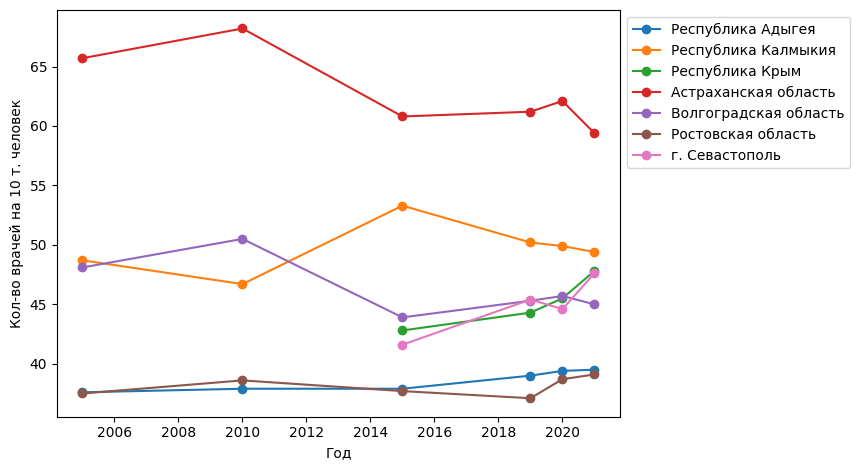

In [88]:
x = [2005, 2010, 2015, 2019, 2020, 2021]
for i in range(len(df_SFO)):
    y = df_SFO.iloc[i]
    plt.plot(x, y, marker='o')
    plt.xlabel('Год')
    plt.ylabel('Кол-во врачей на 10 т. человек')
plt.tight_layout()
plt.legend(df_SFO.index, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

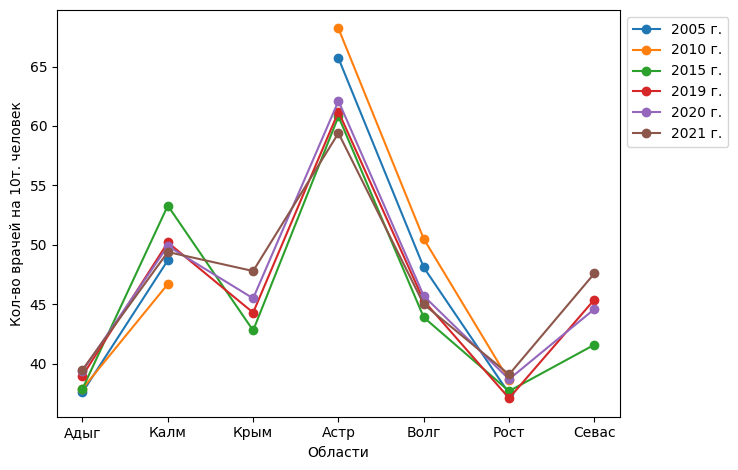

In [89]:
x = ["Адыг", "Калм", "Крым", "Астр", "Волг", "Рост", "Севас"]
for i in range(len(df_SFO.columns)):
    y = df_SFO.iloc[:, i]
    plt.plot(x, y, marker='o')
    plt.xlabel('Области')
    plt.ylabel('Кол-во врачей на 10т. человек')
plt.tight_layout()
plt.legend(df_SFO.columns, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

C:\Users\Даня\AppData\Local\Temp\ipykernel_14572\70159749.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=df_SFO.columns)
C:\Users\Даня\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\cbook.py:1320: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Даня\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\cbook.py:1327: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\Даня\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\cbook.py:1335: RuntimeWarning: invalid value encountered in less
  x[x < stats['wh

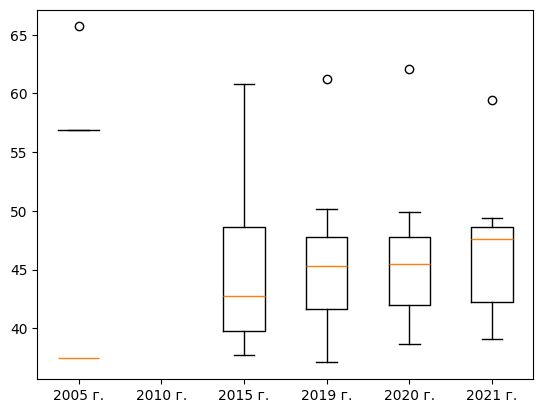

In [90]:
data = [df_SFO.iloc[:, i].values for i in range(len(df_SFO.columns))]
plt.boxplot(data, labels=df_SFO.columns)
plt.show()

#### Вычислить описательную статистику: среднее, стандартное отклонение, квартили, минимальное и максимальное значения показателя X в каждый год периода T в Южном Федеральном Округе.

In [91]:
df_SFO.loc['mean'] = df_SFO.loc[:"г. Севастополь"].mean(axis=0)
df_SFO.loc['median'] = df_SFO.loc[:"г. Севастополь"].median(axis=0)
df_SFO.loc['std'] = df_SFO.loc[:"г. Севастополь"].std(axis=0)
df_SFO.loc['var'] = df_SFO.loc[:"г. Севастополь"].var(axis=0)
df_SFO.loc['max'] = df_SFO.loc[:"г. Севастополь"].max(axis=0)
df_SFO.loc['min'] = df_SFO.loc[:"г. Севастополь"].min(axis=0)
df_SFO.loc['quantile_25'] = df_SFO.loc[:"г. Севастополь"].quantile(
    0.25, axis=0)
df_SFO.loc['quantile_75'] = df_SFO.loc[:"г. Севастополь"].quantile(
    0.75, axis=0)
df_SFO

,2005 г.,2010 г.,2015 г.,2019 г.,2020 г.,2021 г.
Название области,,,,,,
Республика Адыгея,37.6,37.900000,37.900000,39.000000,39.400000,39.500000
Республика Калмыкия,48.7,46.700000,53.300000,50.200000,49.900000,49.400000
Республика Крым,NaN,NaN,42.800000,44.300000,45.500000,47.800000
Астраханская область,65.7,68.200000,60.800000,61.200000,62.100000,59.400000
Волгоградская область,48.1,50.500000,43.900000,45.300000,45.700000,45.000000
Ростовская область,37.5,38.600000,37.700000,37.100000,38.700000,39.100000
г. Севастополь,NaN,NaN,41.600000,45.400000,44.600000,47.600000
mean,47.52,48.380000,45.428571,46.071429,46.557143,46.828571
median,48.1,46.700000,42.800000,45.300000,45.500000,47.600000


#### Проверить, можно ли считать, что распределение случайной величины X в Южном Федеральном Округе в каждый год периода T подчинено нормальному закону распределения. Использовать для проверки тест Шапиро-Уилка (уровень значимости α = 0,055). Для дальнейшего исследования использовать только те года, для которых распределение случайного показателя X можно считать нормальным.

In [92]:
alpha = 0.055
df_SFO.loc['p_value'] = 0
df_SFO.loc['is norm'] = 'Nan'

for column in df_SFO.columns:

    stat, p_value = stats.shapiro(df_SFO[column].loc[:"г. Севастополь"])
    print(p_value)
    df_SFO.at['p_value', column] = p_value
    if p_value > alpha:
        df_SFO.at['is norm', column] = 'Normal'
    else:
        df_SFO.at['is norm', column] = 'Not normal'

df_SFO

nan
nan
0.1418225775849501
0.3667275152775429
0.16575571116237275
0.39360871078657145


,2005 г.,2010 г.,2015 г.,2019 г.,2020 г.,2021 г.
Название области,,,,,,
Республика Адыгея,37.6,37.9,37.9,39.0,39.4,39.5
Республика Калмыкия,48.7,46.7,53.3,50.2,49.9,49.4
Республика Крым,NaN,NaN,42.8,44.3,45.5,47.8
Астраханская область,65.7,68.2,60.8,61.2,62.1,59.4
Волгоградская область,48.1,50.5,43.9,45.3,45.7,45.0
Ростовская область,37.5,38.6,37.7,37.1,38.7,39.1
г. Севастополь,NaN,NaN,41.6,45.4,44.6,47.6
mean,47.52,48.38,45.428571,46.071429,46.557143,46.828571
median,48.1,46.7,42.8,45.3,45.5,47.6


#### Выделить те года t1-tm с нормально распределенными значениями рядов данных Xt1-Xtm, где Xt1-Xtm имеют одинаковую дисперсию (уровень значимости взять равным α). Использовать для проверки нулевой гипотезы о равенстве дисперсий тесты Бартлетта и Левена.

In [93]:
import itertools
from scipy import stats

# Проверка на наличие пустых значений в столбцах
valid_columns = [
    col for col in df_SFO.columns if not df_SFO[col].isnull().all()]

pairs = itertools.combinations(valid_columns, 2)

for col1, col2 in pairs:
    group_1 = df_SFO[col1].loc[:"г. Севастополь"]
    group_2 = df_SFO[col2].loc[:"г. Севастополь"]

    group_1 = group_1.dropna()
    group_2 = group_2.dropna()

    if group_1.empty or group_2.empty:
        print(f"Пропущена пара столбцов {col1} и {
              col2} из-за отсутствия данных.")
        continue

    # Тест Бартлетта
    bartlett_stat, bartlett_p_value = stats.bartlett(group_1, group_2)
    print(f'Бартлетт (столбцы {col1} и {col2}): Статистика = {
          bartlett_stat:.4f}, p-значение = {bartlett_p_value:.4f}')
    if bartlett_p_value < 0.05:
        print(f"   Дисперсии значимо различаются.\n")
    else:
        print(f"   Нет оснований отклонить гипотезу о равенстве дисперсий.\n")

    # Тест Левена
    levene_stat, levene_p_value = stats.levene(group_1, group_2)
    print(f'Левен (столбцы {col1} и {col2}): Статистика = {
          levene_stat:.4f}, p-значение = {levene_p_value:.4f}')
    if levene_p_value < 0.05:
        print(f"   Дисперсии значимо различаются.\n")
    else:
        print(f"   Нет оснований отклонить гипотезу о равенстве дисперсий.")
    print('\n', "===================================================================================", '\n')

Бартлетт (столбцы 2005 г. и 2010 г.): Статистика = 0.0153, p-значение = 0.9014
   Нет оснований отклонить гипотезу о равенстве дисперсий.

Левен (столбцы 2005 г. и 2010 г.): Статистика = 0.0138, p-значение = 0.9094
   Нет оснований отклонить гипотезу о равенстве дисперсий.


Бартлетт (столбцы 2005 г. и 2015 г.): Статистика = 0.3966, p-значение = 0.5289
   Нет оснований отклонить гипотезу о равенстве дисперсий.

Левен (столбцы 2005 г. и 2015 г.): Статистика = 0.2545, p-значение = 0.6249
   Нет оснований отклонить гипотезу о равенстве дисперсий.


Бартлетт (столбцы 2005 г. и 2019 г.): Статистика = 0.6083, p-значение = 0.4354
   Нет оснований отклонить гипотезу о равенстве дисперсий.

Левен (столбцы 2005 г. и 2019 г.): Статистика = 0.4922, p-значение = 0.4990
   Нет оснований отклонить гипотезу о равенстве дисперсий.


Бартлетт (столбцы 2005 г. и 2020 г.): Статистика = 0.6494, p-значение = 0.4203
   Нет оснований отклонить гипотезу о равенстве дисперсий.

Левен (столбцы 2005 г. и 2020 г.)

#### Проверить, можно ли считать, что среднее значение показателя X по Южному Федеральному Округу в каждый год периода t1-tm значимо выше (ниже) общероссийского значения показателя X (уровень значимости взять равным α). Общероссийские значения показателя X найти в файле CHISLO_DOCTORS.xlsx. Использовать для проверки гипотезы о равенстве средних t-тест для одной выборки.

In [94]:
df = pd.read_excel("CHISLO_DOCTORS.xlsx", sheet_name='ROSSTAT')
df_RU = df.iloc[[3]].iloc[:, 7:13]
df_RU.columns = ['2005 г.', '2010 г.',
                 '2015 г.', '2019 г.', '2020 г.', '2021 г.']
df_RU.insert(0, 'Название', ['Российская Федерация'])
df_RU.set_index("Название", inplace=True)
df_RU

,2005 г.,2010 г.,2015 г.,2019 г.,2020 г.,2021 г.
Название,,,,,,
Российская Федерация,48.6,50.1,45.9,48.7,50.4,51.0


In [95]:
for column in df_SFO.columns:
    sample = df_SFO[column].loc[:"г. Севастополь"].to_list()
    mean_sample = df_SFO[column].loc["mean"]
    mean_ru = df_RU[column].loc["Российская Федерация"]
    print(sample, f"среднее по выбьорке: {
          mean_sample}; среднее по РФ: {mean_ru}")
    if mean_sample < mean_ru:
        t_statistic, p_value = stats.ttest_1samp(
            sample, mean_ru, alternative="less")
        print(p_value)
        if p_value < 0.055:
            print("Среднее значение выборки статистически меньше среднего по РФ")
        else:
            print("Нет статистически значимого различия (меньше)")
    else:
        t_statistic, p_value = stats.ttest_1samp(
            sample, mean_ru, alternative="greater")
        print(p_value)
        if p_value < 0.055:
            print("Среднее значение выборки статистически больше среднего по РФ")
        else:
            print("Нет статистически значимого различия (больше)")

[37.6, 48.7, nan, 65.7, 48.1, 37.5, nan] среднее по выбьорке: 47.519999999999996; среднее по РФ: 48.6
nan
Нет статистически значимого различия (меньше)
[37.9, 46.7, nan, 68.2, 50.5, 38.6, nan] среднее по выбьорке: 48.38; среднее по РФ: 50.1
nan
Нет статистически значимого различия (меньше)
[37.9, 53.3, 42.8, 60.8, 43.9, 37.7, 41.6] среднее по выбьорке: 45.42857142857144; среднее по РФ: 45.9
0.44439267294719315
Нет статистически значимого различия (меньше)
[39.0, 50.2, 44.3, 61.2, 45.3, 37.1, 45.4] среднее по выбьорке: 46.07142857142857; среднее по РФ: 48.7
0.20806434534209928
Нет статистически значимого различия (меньше)
[39.4, 49.9, 45.5, 62.1, 45.7, 38.7, 44.6] среднее по выбьорке: 46.557142857142864; среднее по РФ: 50.4
0.12189647533577096
Нет статистически значимого различия (меньше)
[39.5, 49.4, 47.8, 59.4, 45.0, 39.1, 47.6] среднее по выбьорке: 46.82857142857143; среднее по РФ: 51.0
0.07958096825377825
Нет статистически значимого различия (меньше)


In [96]:
import itertools
columns = df_SFO.columns
pairs = itertools.combinations(columns, 2)

for col1, col2 in pairs:
    group_1 = df_SFO[col1].loc[:"г. Севастополь"].dropna().to_list()
    group_2 = df_SFO[col2].loc[:"г. Севастополь"].dropna().to_list()

    mean_1 = df_SFO[col1].loc["mean"]
    mean_2 = df_SFO[col2].loc["mean"]

    # Сравнение средних и t-тест
    if mean_1 < mean_2:
        t_statistic, p_value = stats.ttest_ind(
            group_1, group_2, alternative='less')
        if p_value < 0.055:
            print(f"Среднее значение выборки {
                  col1} статистически меньше выборки {col2}")
        else:
            print(f"Нет статистически значимого различия между {
                  col1} и {col2} (меньше)")
    else:
        t_statistic, p_value = stats.ttest_ind(
            group_1, group_2, alternative='greater')
        if p_value < 0.055:
            print(f"Среднее значение выборки {
                  col1} статистически больше выборки {col2}")
        else:
            print(f"Нет статистически значимого различия между {
                  col1} и {col2} (больше)")

    print(f"P_value: {p_value}", )
    print('\n', "===================================================================================", '\n')

Нет статистически значимого различия между 2005 г. и 2010 г. (меньше)
P_value: 0.45599418760547045


Нет статистически значимого различия между 2005 г. и 2015 г. (больше)
P_value: 0.36217608723575634


Нет статистически значимого различия между 2005 г. и 2019 г. (больше)
P_value: 0.40040598101162655


Нет статистически значимого различия между 2005 г. и 2020 г. (больше)
P_value: 0.43301352803586085


Нет статистически значимого различия между 2005 г. и 2021 г. (больше)
P_value: 0.44923297566254444


Нет статистически значимого различия между 2010 г. и 2015 г. (больше)
P_value: 0.3162359772479988


Нет статистически значимого различия между 2010 г. и 2019 г. (больше)
P_value: 0.34985126088088214


Нет статистически значимого различия между 2010 г. и 2020 г. (больше)
P_value: 0.37963616783903126


Нет статистически значимого различия между 2010 г. и 2021 г. (больше)
P_value: 0.3921915631108137


Нет статистически значимого различия между 2015 г. и 2019 г. (меньше)
P_value: 0.443340556164

In [97]:
data = []
for column in df_SFO.columns:
    # Убираем пропуски (NaN) перед добавлением в список
    clean_data = df_SFO[column].loc[:"г. Севастополь"].dropna().to_list()
    data.append(clean_data)

print(data)
result = stats.tukey_hsd(*data)
print('\n', result)

[[37.6, 48.7, 65.7, 48.1, 37.5], [37.9, 46.7, 68.2, 50.5, 38.6], [37.9, 53.3, 42.8, 60.8, 43.9, 37.7, 41.6], [39.0, 50.2, 44.3, 61.2, 45.3, 37.1, 45.4], [39.4, 49.9, 45.5, 62.1, 45.7, 38.7, 44.6], [39.5, 49.4, 47.8, 59.4, 45.0, 39.1, 47.6]]

 Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.860     1.000   -18.163    16.443
 (0 - 2)      2.091     0.999   -13.928    18.111
 (0 - 3)      1.449     1.000   -14.571    17.468
 (0 - 4)      0.963     1.000   -15.056    16.982
 (0 - 5)      0.691     1.000   -15.328    16.711
 (1 - 0)      0.860     1.000   -16.443    18.163
 (1 - 2)      2.951     0.993   -13.068    18.971
 (1 - 3)      2.309     0.998   -13.711    18.328
 (1 - 4)      1.823     0.999   -14.196    17.842
 (1 - 5)      1.551     1.000   -14.468    17.571
 (2 - 0)     -2.091     0.999   -18.111    13.928
 (2 - 1)     -2.951     0.993   -18.971    13.068
 (2 - 3)     -0.643     1.000   -15.266

In [98]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = []
groups = []

for column in df_SFO.columns:
    clean_data = df_SFO[column].loc[:"г. Севастополь"].dropna()
    data.extend(clean_data.to_list())  # Значения без NaN
    # Группы (имя столбца) без учета NaN
    groups.extend([column] * len(clean_data))

# Выполняем тест Тьюки
tukey_result = pairwise_tukeyhsd(data, groups, alpha=0.055)

print(tukey_result.summary())

  Multiple Comparison of Means - Tukey HSD, FWER=0.06  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
2005 г. 2010 г.     0.86    1.0 -16.2046 17.9246  False
2005 г. 2015 г.  -2.0914 0.9986 -17.8902 13.7073  False
2005 г. 2019 г.  -1.4486 0.9998 -17.2473 14.3502  False
2005 г. 2020 г.  -0.9629    1.0 -16.7616 14.8359  False
2005 г. 2021 г.  -0.6914    1.0 -16.4902 15.1073  False
2010 г. 2015 г.  -2.9514  0.993 -18.7502 12.8473  False
2010 г. 2019 г.  -2.3086 0.9978 -18.1073 13.4902  False
2010 г. 2020 г.  -1.8229 0.9993 -17.6216 13.9759  False
2010 г. 2021 г.  -1.5514 0.9997 -17.3502 14.2473  False
2015 г. 2019 г.   0.6429    1.0 -13.7794 15.0651  False
2015 г. 2020 г.   1.1286 0.9999 -13.2937 15.5508  False
2015 г. 2021 г.      1.4 0.9997 -13.0222 15.8222  False
2019 г. 2020 г.   0.4857    1.0 -13.9365  14.908  False
2019 г. 2021 г.   0.7571    1.0 -13.6651 15.1794  False
2020 г. 2021 г.   0.2714    1.0 -14.1508 14.6937

#### Проверить значимость отличий средних в выбранной группе (уровень значимости взять равным α). Использовать для проверки гипотезы о равенстве средних групп тест Тьюки и односторонний тест ANOVA.

In [99]:
data = []
for column in df_SFO.columns:
    # Убираем пропуски
    clean_data = df_SFO[column].loc[:"г. Севастополь"].dropna().to_list()
    data.append(clean_data)

print(data)
# Применяем ANOVA
statistic, p_value = stats.f_oneway(*data)
print('\n', statistic, p_value)
if p_value < 0.055:
    print('\n', "Существенные статистические различия между средними выборок")
else:
    print('\n', "Нет статистически значимого различия между средними выборок")

[[37.6, 48.7, 65.7, 48.1, 37.5], [37.9, 46.7, 68.2, 50.5, 38.6], [37.9, 53.3, 42.8, 60.8, 43.9, 37.7, 41.6], [39.0, 50.2, 44.3, 61.2, 45.3, 37.1, 45.4], [39.4, 49.9, 45.5, 62.1, 45.7, 38.7, 44.6], [39.5, 49.4, 47.8, 59.4, 45.0, 39.1, 47.6]]

 0.07795321843546181 0.9951841291678812

 Нет статистически значимого различия между средними выборок
